# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
df['Mouse ID'].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
index_df = df.set_index('Mouse ID')
index_df.loc['g989']

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = index_df.drop(['g989'])
clean_df2 = clean_df.reset_index()

In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df2['Mouse ID'].value_counts()

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
# for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
tumor = clean_df2.groupby(['Drug Regimen'])
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_mean = tumor['Tumor Volume (mm3)'].mean()
tumor_med = tumor['Tumor Volume (mm3)'].median()
tumor_var = tumor['Tumor Volume (mm3)'].var()
tumor_std = tumor['Tumor Volume (mm3)'].std()
tumor_sem = tumor['Tumor Volume (mm3)'].sem()

tumor_df = pd.DataFrame({
                        "Mean": tumor_mean,
                        "Median": tumor_med,
                        "Variance": tumor_var,
                        "Standard Deviation": tumor_std,
                        "SEM": tumor_sem
                        })

# Assemble the resulting series into a single summary DataFrame.
tumor_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_comb = clean_df2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_comb

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

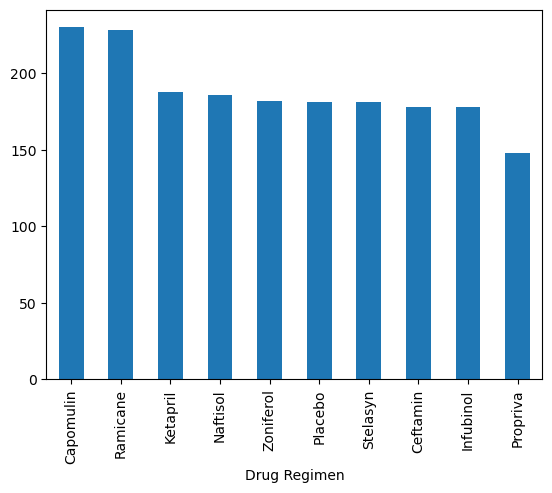

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timemouse = clean_df2.groupby(['Drug Regimen'])['Timepoint'].count()
timemouse.sort_values(ascending=False).plot.bar()
plt.show()

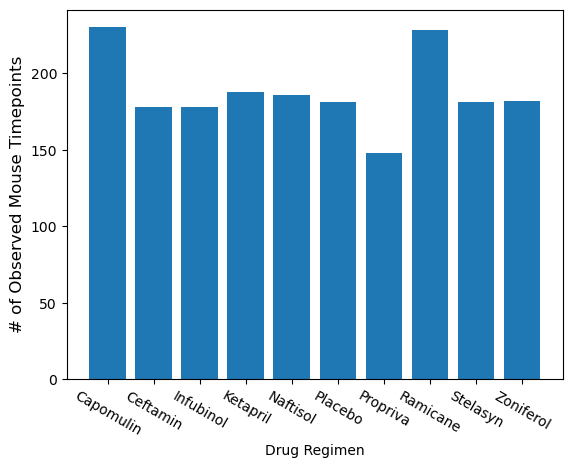

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timemouse_py = timemouse.sort_values(ascending=False)
plt.bar(timemouse.index, timemouse.values)
plt.ylabel('# of Observed Mouse Timepoints', size=12)
plt.xlabel('Drug Regimen')
plt.xticks(rotation=-30)
plt.show()

<AxesSubplot:ylabel='Sex'>

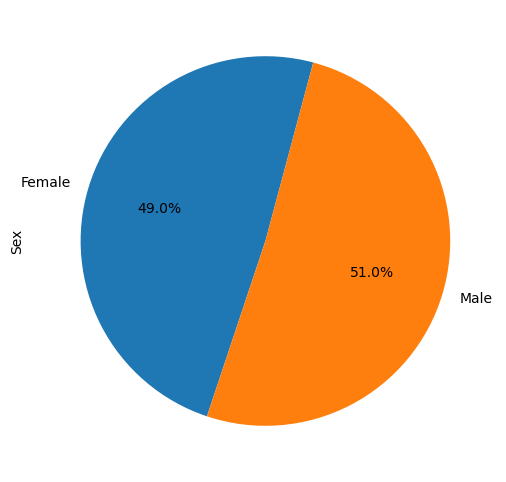

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mtf = clean_df2.groupby(['Sex'])['Sex'].count()
mtf.plot.pie(startangle=75,autopct='%1.1f%%', figsize=(6, 6))

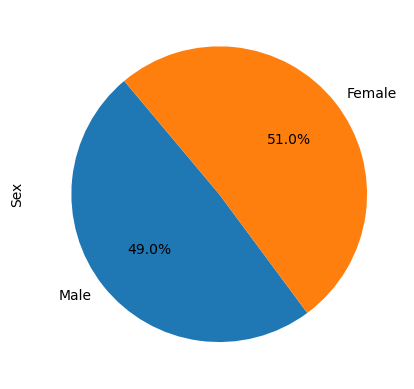

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mtf, labels=('Male','Female'), startangle=130, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
gt_mouse = clean_df2.groupby(['Mouse ID'])['Timepoint'].max()
gt_mouse_df = pd.DataFrame(gt_mouse)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
gt_mouse_df = pd.merge(clean_df2, gt_mouse_df, on=('Mouse ID', 'Timepoint'), how='right')
gt_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treat_reg = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tvol_cap = []
tvol_ram = []
tvol_inf = []
tvol_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in gt_mouse_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tvol_cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treat_reg[1]:
        tvol_ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treat_reg[2]:
        tvol_inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treat_reg[3]:
        tvol_cef.append(row['Tumor Volume (mm3)'])
        
    # add subset 
tvol_df = pd.DataFrame({"Capomulin": tvol_cap,
                       treat_reg[1]: tvol_ram,
                       treat_reg[2]: tvol_inf,
                       treat_reg[3]: tvol_cef})
    
    # Determine outliers using upper and lower bounds
tvol_df_max = tvol_df.max()
tvol_df_min = tvol_df.min()
tvol_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [16]:
    # Determine outliers using upper and lower bounds "Capomulin", "Ramicane", "Infubinol", "Ceftamin"
quartile_cap = tvol_df[treat_reg[0]].quantile([.25, .5, .75])
low_cap = quartile_cap[.25]
med_cap = quartile_cap[.5]
up_cap = quartile_cap[.75]
iqr_cap = up_cap-low_cap
lowb_cap = low_cap - (1.5*iqr_cap)
upb_cap = up_cap + (1.5*iqr_cap)
max_cap = tvol_df[treat_reg[0]].max()
min_cap = tvol_df[treat_reg[0]].min()

quartile_ram = tvol_df[treat_reg[1]].quantile([.25, .5, .75])
low_ram = quartile_ram[.25]
med_ram = quartile_ram[.5]
up_ram = quartile_ram[.75]
iqr_ram = up_ram-low_ram
lowb_ram = low_ram - (1.5*iqr_ram)
upb_ram = up_ram + (1.5*iqr_ram)
max_ram = tvol_df[treat_reg[1]].max()
min_ram = tvol_df[treat_reg[1]].min()

quartile_inf = tvol_df[treat_reg[2]].quantile([.25, .5, .75])
low_inf = quartile_inf[.25]
med_inf = quartile_inf[.5]
up_inf = quartile_inf[.75]
iqr_inf = up_inf-low_inf
lowb_inf = low_inf - (1.5*iqr_inf)
upb_inf = up_inf + (1.5*iqr_inf)
max_inf = tvol_df[treat_reg[2]].max()
min_inf = tvol_df[treat_reg[2]].min()

quartile_cef = tvol_df[treat_reg[3]].quantile([.25, .5, .75])
low_cef = quartile_cef[.25]
med_cef = quartile_cef[.5]
up_cef = quartile_cef[.75]
iqr_cef = up_cef-low_cef
lowb_cef = low_cef - (1.5*iqr_cef)
upb_cef = up_cef + (1.5*iqr_cef)
max_cef = tvol_df[treat_reg[3]].max()
min_cef = tvol_df[treat_reg[3]].min()

outlier = pd.DataFrame({'Treatment': treat_reg,
                       'Lower Quartile':[low_cap, low_ram, low_inf, low_cef],
                       'Upper Quartile':[up_cap, up_ram, up_inf, up_cef],
                       'IQR':[iqr_cap, iqr_ram, iqr_inf, iqr_cef],
                       'Median':[med_cap, med_ram, med_inf, med_cef],
                       'Upper Bound':[upb_cap, upb_ram, upb_inf, upb_cef],
                       'Lower Bound':[lowb_cap, lowb_ram, lowb_inf, lowb_cef],
                       'Max':[max_cap, max_ram, max_inf, max_cef],
                       'Min':[min_cap, min_ram, min_inf, min_cef]})

outlier

,Treatment,Lower Quartile,Upper Quartile,IQR,Median,Upper Bound,Lower Bound,Max,Min
0,Capomulin,32.377357,40.159220,7.781863,38.125164,51.832015,20.704562,47.685963,23.343598
1,Ramicane,31.560470,40.659006,9.098537,36.561652,54.306811,17.912664,45.220869,22.050126
2,Infubinol,54.048608,65.525743,11.477135,60.165180,82.741446,36.832905,72.226731,36.321346
3,Ceftamin,48.722078,64.299830,15.577752,59.851956,87.666458,25.355450,68.923185,45.000000


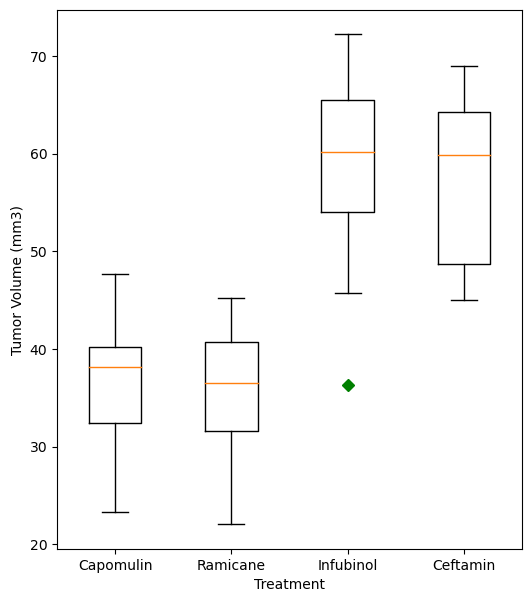

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplt = [tvol_df[treat_reg[0]],
          tvol_df[treat_reg[1]],
          tvol_df[treat_reg[2]],
          tvol_df[treat_reg[3]]]

plot, ax = plt.subplots(figsize=(6,7))
ax.set_xlabel('Treatment')
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(boxplt, 0, 'gD')
plt.xticks([1,2,3,4], treat_reg)
plt.savefig('boxplot')
plt.show()

In [46]:
 # If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = tvol_df['Infubinol'].quantile([.25,.5,.75])
low_q = quartiles[.25]
up_q = quartiles[.75]
iqr = up_q-low_q

print(f"The lower quartile of temperatures is: {low_q}")
print(f"The upper quartile of temperatures is: {up_q}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[.5]} ")

lower_bound = low_q - (1.5*iqr)
upper_bound = up_q + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


## Line and Scatter Plots

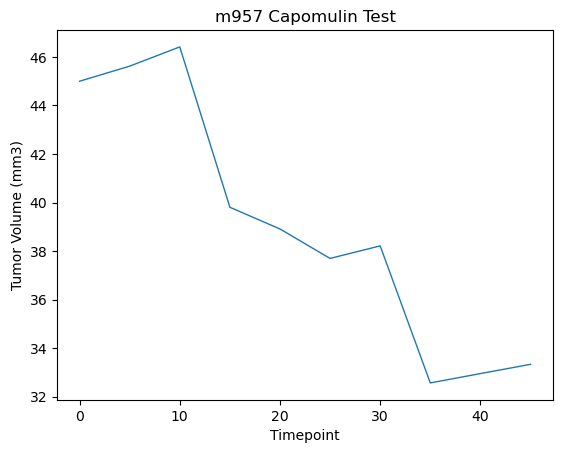

In [31]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
m957_df = clean_df2.loc[clean_df2["Mouse ID"] == "m957",:]
m957_df

tvolm957 = m957_df["Tumor Volume (mm3)"]
Tm957 =  m957_df["Timepoint"]

plt.title('m957 Capomulin Test')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.plot(Tm957, tvolm957, linewidth=1, markersize = 10)

plt.show()

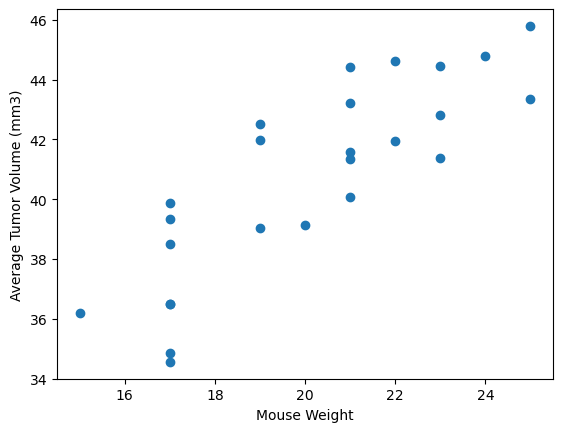

In [34]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mvt_cap_df = clean_df2.loc[clean_df2["Drug Regimen"] == "Capomulin",:]
avgt = mvt_cap_df.groupby(['Mouse ID']).mean()

#scatterplot
plt.scatter(avgt['Weight (g)'], avgt['Tumor Volume (mm3)'])
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Mouse Weight')

plt.show()

## Correlation and Regression

In [40]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mtcor=round(st.pearsonr(avgt['Weight (g)'], avgt['Tumor Volume (mm3)'])[0],2)
print(f"Correlation of weight and average tumor volume is {mtcor}")

Correlation of weight and average tumor volume is 0.84


In [41]:
#calculate regression
mtreg=st.linregress(avgt['Weight (g)'],avgt['Tumor Volume (mm3)'])
mtreg

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [42]:
#defining the slope and intercept
slope=0.9544396890241049
intercept=21.552160532685008

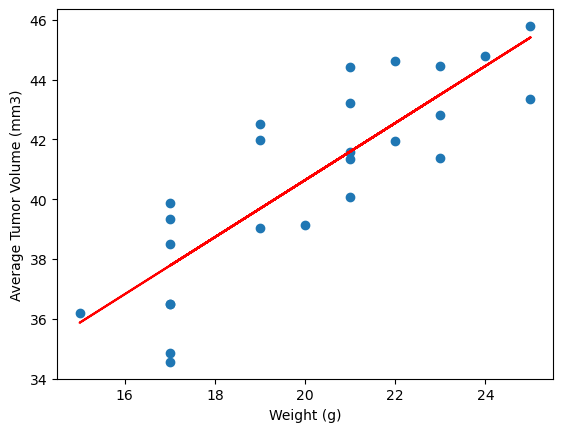

In [44]:
#create the line
lin_line = slope*(avgt['Weight (g)'])+intercept
#create the chart (copy above)
plt.scatter(avgt['Weight (g)'], avgt['Tumor Volume (mm3)'])

plt.plot(avgt['Weight (g)'], lin_line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()